# **Authenticate and set up BigQuery client:** ✔


In [ ]:
# Configuration for Google Colab

# !pip install google-cloud-bigquery
# !pip install rich
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib

from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from google.colab import output
import time

from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.text import Text
from rich.align import Align
from rich import box

# Initialize Rich console
console = Console()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set up matplotlib for inline plotting in Colab
%matplotlib inline

# Configure pandas display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Clear the output to remove installation messages
clear_output()


#Animation
with console.status("[bold green]Configuring...") as status:

    time.sleep(2)
    status.update("[bold green]Configuration complete!")
    time.sleep(1)

console.print(Align("[bold green]Configuration complete![/bold green]", align="center"))


Output()

Configuration complete!

In [ ]:

# Authenticate and create BigQuery client
auth.authenticate_user()
project_id = "your_project_id"  #------------------------------------------->Attention
client = bigquery.Client(project=project_id)

console.print(Panel(f"[bold green]Current project ID:[/bold green] {project_id}"))

test_query = """
SELECT COUNT(*) as count
FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`
"""

try:
    df = client.query(test_query).to_dataframe()

    # Create a Rich table to display the result
    table = Table(title="Test Query Result")
    table.add_column("Count", style="cyan")

    for _, row in df.iterrows():
        table.add_row(str(row['count']))

    console.print(Panel(table, expand=False))

except Exception as e:
    console.print(Panel(f"[bold red]An error occurred:[/bold red] {str(e)}", expand=False))

#**Events and Users**

In [ ]:

# Define the query
query = """
SELECT
  PARSE_DATE('%Y%m%d', event_date) AS date,
  COUNT(*) AS total_events,
  COUNT(DISTINCT user_pseudo_id) AS unique_users
FROM
  `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`
GROUP BY
  date
ORDER BY
  date
"""

# Execute the query and convert results to DataFrame
df = client.query(query).to_dataframe()



# Create a Rich table to display the data
table = Table(title="Daily Events and Users")
table.add_column("Date", style="cyan")
table.add_column("Total Events", style="magenta")
table.add_column("Unique Users", style="green")

for _, row in df.iterrows():
    table.add_row(str(row['date']), str(row['total_events']), str(row['unique_users']))

# Display the table
console.print(Panel(table, title="Query Results", expand=False))



╭─────────────── Query Results ────────────────╮
│            Daily Events and Users            │
│ ┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓ │
│ ┃ Date       ┃ Total Events ┃ Unique Users ┃ │
│ ┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩ │
│ │ 2021-01-31 │ 26489        │ 2546         │ │
│ └────────────┴──────────────┴──────────────┘ │
╰──────────────────────────────────────────────╯

#Nested Structures (Record)

In [ ]:
query = """
SELECT *
FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`
"""
df = client.query(query).to_dataframe()

console.print(Panel(", ".join(df.columns), title="All Columns", expand=False))

╭────────────────────────────────────────────────── All Columns ──────────────────────────────────────────────────╮
│ event_date, event_timestamp, event_name, event_params, event_previous_timestamp, event_value_in_usd,            │
│ event_bundle_sequence_id, event_server_timestamp_offset, user_id, user_pseudo_id, privacy_info,                 │
│ user_properties, user_first_touch_timestamp, user_ltv, device, geo, app_info, traffic_source, stream_id,        │
│ platform, event_dimensions, ecommerce, items                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
from io import StringIO

buffer = StringIO()
df.info(buf=buffer)
info_output = buffer.getvalue()

info_panel = Panel(info_output, title="DataFrame Info", border_style="bold blue")
console.print(info_panel)

dtype_counts = pd.value_counts(df.dtypes)

dtype_table = Table(title="DataFrame Data Types")
dtype_table.add_column("Data Type", style="cyan")
dtype_table.add_column("Count", style="magenta")

for dtype, count in dtype_counts.items():
    dtype_table.add_row(str(dtype), str(count))

console.print(dtype_table)

console.print(Panel(
    f"Total number of columns: {len(df.columns)}\nTotal number of rows: {len(df)}",
    title="Additional Information",
    border_style="bold blue"
))


╭──────────────────────────────────────────────── DataFrame Info ─────────────────────────────────────────────────╮
│ <class 'pandas.core.frame.DataFrame'>                                                                           │
│ RangeIndex: 26489 entries, 0 to 26488                                                                           │
│ Data columns (total 23 columns):                                                                                │
│  #   Column                         Non-Null Count  Dtype                                                       │
│ ---  ------                         --------------  -----                                                       │
│  0   event_date                     26489 non-null  object                                                      │
│  1   event_timestamp                26489 non-null  Int64                                                       │
│  2   event_name                     26489 non-null  object                                                      │
│  3   event_params                   26489 non-null  object                                                      │
│  4   event_previous_timestamp       0 non-null      Int64                                                       │
│  5   event_value_in_usd             0 non-null      float64                                                     │
│  6   event_bundle_sequence_id       26489 non-null  Int64                                                       │
│  7   event_server_timestamp_offset  0 non-null      Int64                                                       │
│  8   user_id                        0 non-null      object                                                      │
│  9   user_pseudo_id                 26489 non-null  object                                                      │
│  10  privacy_info                   26489 non-null  object                                                      │
│  11  user_properties                26489 non-null  object                                                      │
│  12  user_first_touch_timestamp     25531 non-null  Int64                                                       │
│  13  user_ltv                       26489 non-null  object                                                      │
│  14  device                         26489 non-null  object                                                      │
│  15  geo                            26489 non-null  object                                                      │
│  16  app_info                       0 non-null      object                                                      │
│  17  traffic_source                 26489 non-null  object                                                      │
│  18  stream_id                      26489 non-null  Int64                                                       │
│  19  platform                       26489 non-null  object                                                      │
│  20  event_dimensions               0 non-null      object                                                      │
│  21  ecommerce                      26489 non-null  object                                                      │
│  22  items                          26489 non-null  object                                                      │
│ dtypes: Int64(6), float64(1), object(16)                                                                        │
│ memory usage: 4.8+ MB                                                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

DataFrame Data Types 
┏━━━━━━━━━━━┳━━━━━━━┓
┃ Data Type ┃ Count ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ object    │ 16    │
│ Int64     │ 6     │
│ float64   │ 1     │
└───────────┴───────┘

╭──────────────────────────────────────────── Additional Information ─────────────────────────────────────────────╮
│ Total number of columns: 23                                                                                     │
│ Total number of rows: 26489                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:

def create_table(data, title, columns_to_show=None):
    table = Table(title=title, show_header=True, header_style="bold magenta")

    # Add only specified columns or all if not specified
    columns = columns_to_show if columns_to_show else data[0].keys()
    for key in columns:
        table.add_column(key, style="cyan")

    # Add rows
    for item in data:
        table.add_row(*[str(item.get(key, '')) for key in columns])

    return table

# Assuming df is your DataFrame
# Let's first check if the DataFrame is loaded correctly
console.print(f"DataFrame shape: {df.shape}")
console.print(f"DataFrame columns: {df.columns.tolist()}")

# Now let's create and print the device table
if 'device' in df.columns:
    device_data = df['device'].head().tolist()
    device_table = create_table(device_data, "Device",
                                ['category', 'mobile_brand_name', 'operating_system'])
    console.print(device_table)
else:
    console.print("'device' column not found in the DataFrame")

# Let's also create and print tables for other nested structures
if 'geo' in df.columns:
    geo_table = create_table(df['geo'].head().tolist(), "Geo")
    console.print(geo_table)


DataFrame shape: (26489, 23)

DataFrame columns: ['event_date', 'event_timestamp', 'event_name', 'event_params', 'event_previous_timestamp', 
'event_value_in_usd', 'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id', 'user_pseudo_id', 
'privacy_info', 'user_properties', 'user_first_touch_timestamp', 'user_ltv', 'device', 'geo', 'app_info', 
'traffic_source', 'stream_id', 'platform', 'event_dimensions', 'ecommerce', 'items']

                      Device                       
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ category ┃ mobile_brand_name ┃ operating_system ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ mobile   │ Apple             │ Web              │
│ mobile   │ Apple             │ Web              │
│ mobile   │ Apple             │ Web              │
│ mobile   │ Apple             │ Web              │
│ mobile   │ Apple             │ Web              │
└──────────┴───────────────────┴──────────────────┘

                                         Geo                                          
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ continent ┃ sub_continent    ┃ country       ┃ region     ┃ city       ┃ metro     ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ Americas  │ Northern America │ United States │ California │ San Carlos │ (not set) │
│ Americas  │ Northern America │ United States │ California │ San Carlos │ (not set) │
│ Americas  │ Northern America │ United States │ California │ San Carlos │ (not set) │
│ Americas  │ Northern America │ United States │ California │ San Carlos │ (not set) │
│ Americas  │ Northern America │ United States │ California │ San Carlos │ (not set) │
└───────────┴──────────────────┴───────────────┴────────────┴────────────┴───────────┘

In [ ]:
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
import pandas as pd
import numpy as np

console = Console()

def analyze_nested_structure(data, depth=0, max_depth=5):
    if depth >= max_depth:
        return "Max depth reached"
    if isinstance(data, dict):
        return "dict: " + ", ".join([f"{k}: {analyze_nested_structure(v, depth+1, max_depth)}" for k, v in list(data.items())[:5]] + ["..."] if len(data) > 5 else [])
    elif isinstance(data, list):
        if len(data) > 0:
            return f"list of {len(data)} items, first item: {analyze_nested_structure(data[0], depth+1, max_depth)}"
        else:
            return "empty list"
    else:
        return str(type(data).__name__)

def is_numeric_dtype(dtype):
    try:
        return np.issubdtype(dtype, np.number)
    except TypeError:
        return pd.api.types.is_numeric_dtype(dtype)

def analyze_structure(df, prefix='', depth=0, max_depth=5):
    structure = Table(title=f"Data Structure (Depth: {depth})", show_lines=True)
    structure.add_column("Column", style="cyan", no_wrap=True)
    structure.add_column("Type", style="magenta")
    structure.add_column("Nested Structure", style="green")
    structure.add_column("Sample Data", style="yellow")

    for col in df.columns:
        col_type = str(df[col].dtype)
        nested = "No"
        sample_data = "N/A"

        if df[col].dtype == 'object':
            sample = df[col].dropna().iloc[0] if df[col].notna().any() else None
            if isinstance(sample, dict):
                nested = "Yes (dict)"
                sample_data = analyze_nested_structure(sample, depth=depth, max_depth=max_depth)
            elif isinstance(sample, list):
                nested = "Yes (list)"
                sample_data = analyze_nested_structure(sample, depth=depth, max_depth=max_depth)
            elif isinstance(sample, str):
                nested = "No (string)"
                sample_data = sample[:30] + "..." if len(sample) > 30 else sample
        elif is_numeric_dtype(df[col].dtype):
            nested = "No (numeric)"
            sample_data = str(df[col].iloc[0])

        structure.add_row(f"{prefix}{col}", col_type, nested, str(sample_data)[:100] + "..." if len(str(sample_data)) > 100 else str(sample_data))

        # Recursively analyze nested structures
        if nested.startswith("Yes") and depth < max_depth:
            if isinstance(sample, dict):
                nested_df = pd.DataFrame([sample])
            elif isinstance(sample, list) and len(sample) > 0 and isinstance(sample[0], dict):
                nested_df = pd.DataFrame(sample[:])
            else:
                continue

            console.print(f"\nNested structure for {col} (Depth: {depth + 1}):")
            analyze_structure(nested_df, prefix=f"{prefix}{col}.", depth=depth + 1, max_depth=max_depth)

    console.print(structure)

# Analyze the main DataFrame
console.print(Panel(f"Analyzing {len(df.columns)} columns", style="bold green"))
analyze_structure(df, max_depth=5)  # Increased max_depth to 5

# Detailed analysis of specific columns
for column in ['event_params', 'device', 'ecommerce', 'items']:
    if column in df.columns:
        console.print(f"\nDetailed analysis of '{column}' column:")
        sample = df[column].dropna().iloc[0]
        console.print(analyze_nested_structure(sample, max_depth=6))



╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Analyzing 23 columns                                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Nested structure for privacy_info (Depth: 1):

                           Data Structure (Depth: 1)                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column                            ┃ Type   ┃ Nested Structure ┃ Sample Data ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ privacy_info.analytics_storage    │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ privacy_info.ads_storage          │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ privacy_info.uses_transient_token │ object │ No (string)      │ No          │
└───────────────────────────────────┴────────┴──────────────────┴─────────────┘

Nested structure for user_ltv (Depth: 1):

                   Data Structure (Depth: 1)                    
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column            ┃ Type    ┃ Nested Structure ┃ Sample Data ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ user_ltv.revenue  │ float64 │ No (numeric)     │ 0.0         │
├───────────────────┼─────────┼──────────────────┼─────────────┤
│ user_ltv.currency │ object  │ No (string)      │ USD         │
└───────────────────┴─────────┴──────────────────┴─────────────┘

Nested structure for device (Depth: 1):

Nested structure for web_info (Depth: 2):

                          Data Structure (Depth: 2)                          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column                          ┃ Type   ┃ Nested Structure ┃ Sample Data ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ device.web_info.browser         │ object │ No (string)      │ Safari      │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.web_info.browser_version │ object │ No (string)      │ 13.1        │
└─────────────────────────────────┴────────┴──────────────────┴─────────────┘

                          Data Structure (Depth: 1)                          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column                          ┃ Type   ┃ Nested Structure ┃ Sample Data ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ device.category                 │ object │ No (string)      │ mobile      │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.mobile_brand_name        │ object │ No (string)      │ Apple       │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.mobile_model_name        │ object │ No (string)      │ iPhone      │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.mobile_marketing_name    │ object │ No (string)      │ <Other>     │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.mobile_os_hardware_model │ object │ No               │ N/A         │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.operating_system         │ object │ No (string)      │ Web         │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.operating_system_version │ object │ No (string)      │ <Other>     │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.vendor_id                │ object │ No               │ N/A         │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.advertising_id           │ object │ No               │ N/A         │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.language                 │ object │ No (string)      │ en-us       │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.is_limited_ad_tracking   │ object │ No (string)      │ No          │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.time_zone_offset_seconds │ object │ No               │ N/A         │
├─────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ device.web_info                 │ object │ Yes (dict)       │ dict:       │
└─────────────────────────────────┴────────┴──────────────────┴─────────────┘

Nested structure for geo (Depth: 1):

                     Data Structure (Depth: 1)                      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Column            ┃ Type   ┃ Nested Structure ┃ Sample Data      ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ geo.continent     │ object │ No (string)      │ Americas         │
├───────────────────┼────────┼──────────────────┼──────────────────┤
│ geo.sub_continent │ object │ No (string)      │ Northern America │
├───────────────────┼────────┼──────────────────┼──────────────────┤
│ geo.country       │ object │ No (string)      │ United States    │
├───────────────────┼────────┼──────────────────┼──────────────────┤
│ geo.region        │ object │ No (string)      │ California       │
├───────────────────┼────────┼──────────────────┼──────────────────┤
│ geo.city          │ object │ No (string)      │ San Carlos       │
├───────────────────┼────────┼──────────────────┼──────────────────┤
│ geo.metro         │ object │ No (string)      │ (not set)        │
└───────────────────┴────────┴──────────────────┴──────────────────┘

Nested structure for traffic_source (Depth: 1):

                     Data Structure (Depth: 1)                     
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column                ┃ Type   ┃ Nested Structure ┃ Sample Data ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ traffic_source.medium │ object │ No (string)      │ organic     │
├───────────────────────┼────────┼──────────────────┼─────────────┤
│ traffic_source.name   │ object │ No (string)      │ (organic)   │
├───────────────────────┼────────┼──────────────────┼─────────────┤
│ traffic_source.source │ object │ No (string)      │ google      │
└───────────────────────┴────────┴──────────────────┴─────────────┘

Nested structure for ecommerce (Depth: 1):

                           Data Structure (Depth: 1)                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Column                            ┃ Type   ┃ Nested Structure ┃ Sample Data ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ ecommerce.total_item_quantity     │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.purchase_revenue_in_usd │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.purchase_revenue        │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.refund_value_in_usd     │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.refund_value            │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.shipping_value_in_usd   │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.shipping_value          │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.tax_value_in_usd        │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.tax_value               │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.unique_items            │ object │ No               │ N/A         │
├───────────────────────────────────┼────────┼──────────────────┼─────────────┤
│ ecommerce.transaction_id          │ object │ No               │ N/A         │
└───────────────────────────────────┴────────┴──────────────────┴─────────────┘

                                             Data Structure (Depth: 0)                                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Column                        ┃ Type    ┃ Nested Structure ┃ Sample Data                                        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ event_date                    │ object  │ No (string)      │ 20210131                                           │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_timestamp               │ Int64   │ No (numeric)     │ 1612069510766593                                   │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_name                    │ object  │ No (string)      │ page_view                                          │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_params                  │ object  │ No               │ N/A                                                │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_previous_timestamp      │ Int64   │ No (numeric)     │ <NA>                                               │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_value_in_usd            │ float64 │ No (numeric)     │ nan                                                │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_bundle_sequence_id      │ Int64   │ No (numeric)     │ 6595101026                                         │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ event_server_timestamp_offset │ Int64   │ No (numeric)     │ <NA>                                               │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ user_id                       │ object  │ No               │ N/A                                                │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ user_pseudo_id                │ object  │ No (string)      │ 1026454.4271112504                                 │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ privacy_info                  │ object  │ Yes (dict)       │ dict:                                              │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ user_properties               │ object  │ No               │ N/A                                                │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ user_first_touch_timestamp    │ Int64   │ No (numeric)     │ 1612069510766593                                   │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ user_ltv                      │ object  │ Yes (dict)       │ dict:                                              │
├───────────────────────────────┼─────────┼──────────────────┼────────────────────────────────────────────────────┤
│ device                        │ object  │ Yes (dict)       │ dict: category: str, mobile_brand_name: str,       │
│                               │         │                  │ mobile_model_name: str, mobile_marketing_name:     │
│                               │         │             

Detailed analysis of 'event_params' column:

ndarray

Detailed analysis of 'device' column:

dict: category: str, mobile_brand_name: str, mobile_model_name: str, mobile_marketing_name: str, 
mobile_os_hardware_model: NoneType, ...

Detailed analysis of 'ecommerce' column:

dict: total_item_quantity: NoneType, purchase_revenue_in_usd: NoneType, purchase_revenue: NoneType, 
refund_value_in_usd: NoneType, refund_value: NoneType, ...

Detailed analysis of 'items' column:

ndarray

In [ ]:

query_audience_overview = """
WITH session_details AS (
  SELECT
    COUNT(DISTINCT CASE WHEN page_views = 1 THEN ga_session_id END)
      / COUNT(DISTINCT CONCAT(user_pseudo_id, ga_session_id)) AS session_bounce_rate,
    SUM(CAST(session_engaged AS INT))
      / COUNT(DISTINCT CONCAT(user_pseudo_id, ga_session_id)) AS session_engagement_rate,
    SUM(engagement_time_msec) / 1000  -- in milliseconds
      / COUNT(DISTINCT CONCAT(user_pseudo_id, ga_session_id)) AS ga4_session_duration,
    SUM(end_time - start_time) / 1000000  -- timestamp in microseconds
      / COUNT(DISTINCT CONCAT(user_pseudo_id, ga_session_id)) AS ua_session_duration
  FROM (
    SELECT
      user_pseudo_id,
      (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id') AS ga_session_id,
      COUNT(DISTINCT CASE WHEN event_name = "page_view" THEN CONCAT(user_pseudo_id, event_timestamp) END) AS page_views,
      MAX((SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'session_engaged')) AS session_engaged,
      MAX((SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'engagement_time_msec')) AS engagement_time_msec,
      MIN(event_timestamp) AS start_time,
      MAX(event_timestamp) AS end_time
    FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`
    GROUP BY 1, 2
  )
)
SELECT
  COUNT(DISTINCT user_pseudo_id) AS user_count,
  COUNT(DISTINCT CASE WHEN event_name = "first_visit" THEN user_pseudo_id END) AS new_users,
  COUNT(DISTINCT CASE WHEN event_name = "session_start" THEN CONCAT(user_pseudo_id, event_timestamp) END) AS sessions,
  COUNT(DISTINCT CASE WHEN event_name = "page_view" THEN CONCAT(user_pseudo_id, event_timestamp) END) AS page_views,
  MAX(session_bounce_rate) AS session_bounce_rate,
  MAX(session_engagement_rate) AS session_engagement_rate,
  MAX(ga4_session_duration) AS ga4_session_duration,
  MAX(ua_session_duration) AS ua_session_duration,
  COUNT(DISTINCT CASE WHEN event_name = "session_start" THEN CONCAT(user_pseudo_id, event_timestamp) END)
    / COUNT(DISTINCT user_pseudo_id) AS sessions_per_user,
  COUNT(DISTINCT CASE WHEN event_name = "page_view" THEN CONCAT(user_pseudo_id, event_timestamp) END)
    / COUNT(DISTINCT CASE WHEN event_name = "session_start" THEN CONCAT(user_pseudo_id, event_timestamp) END) AS page_per_session
FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`
CROSS JOIN (SELECT * FROM session_details)
"""


df_ao = client.query(query_audience_overview).to_dataframe()

In [ ]:
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich import box

console = Console()

# Assuming df_ao is your DataFrame with query results

def format_number(value):
    if isinstance(value, float):
        if value < 0.01:
            return f"{value:.4f}"
        elif value < 1:
            return f"{value:.2%}"
        elif value >= 1000000:
            return f"{value/1000000:.2f}M"
        elif value >= 1000:
            return f"{value/1000:.2f}K"
        else:
            return f"{value:.2f}"
    return str(value)

# Create a table for the metrics
table = Table(title="GA4 E-commerce Metrics Overview (January 31, 2021)", box=box.ROUNDED)

# Add columns
table.add_column("Metric", style="cyan", no_wrap=True)
table.add_column("Value", style="magenta", justify="right")

# Add rows with data
for index, row in df_ao.iterrows():
    for column in df_ao.columns:
        table.add_row(column, format_number(row[column]))

# Print the table
console.print(table)

# Create explanations for each metric
explanations = [
    Panel("Total number of unique users who visited the site.", title="User Count"),
    Panel("Number of first-time visitors to the site.", title="New Users"),
    Panel("Total number of sessions initiated by all users.", title="Sessions"),
    Panel("Total number of pages viewed across all sessions.", title="Page Views"),
    Panel("Percentage of single-page sessions (sessions in which the user left the site from the landing page).", title="Session Bounce Rate"),
    Panel("Percentage of sessions that were engaged (involved significant interaction).", title="Session Engagement Rate"),
    Panel("Average session duration calculated using Google Analytics 4 method (in seconds).", title="GA4 Session Duration"),
    Panel("Average session duration calculated using Universal Analytics method (in seconds).", title="UA Session Duration"),
    Panel("Average number of sessions per user.", title="Sessions per User"),
    Panel("Average number of pages viewed per session.", title="Pages per Session")
]

# Print explanations
console.print(Panel("Metric Explanations", style="bold cyan"))
for explanation in explanations:
    console.print(explanation)

# Overall analysis
overall_analysis = f"""
Key Insights:
1. User Acquisition: Out of {format_number(df_ao['user_count'].values[0])} total users, {format_number(df_ao['new_users'].values[0])} ({df_ao['new_users'].values[0]/df_ao['user_count'].values[0]:.1%}) were new users, indicating strong acquisition.

2. Engagement:
   - Low Bounce Rate: Only {df_ao['session_bounce_rate'].values[0]:.2%} of sessions were bounces, suggesting engaging content or effective landing pages.
   - High Engagement Rate: {df_ao['session_engagement_rate'].values[0]:.2%} of sessions were engaged, indicating that users found the content relevant and interesting.

3. Session Behavior:
   - Users viewed an average of {df_ao['page_per_session'].values[0]:.2f} pages per session, showing good content exploration.
   - Each user had an average of {df_ao['sessions_per_user'].values[0]:.2f} sessions, which might indicate repeat visits or multiple interactions per user.

4. Session Duration:
   - GA4 Session Duration: {df_ao['ga4_session_duration'].values[0]:.2f} seconds
   - UA Session Duration: {df_ao['ua_session_duration'].values[0]:.2f} seconds
   The significant difference between GA4 and UA session duration calculations warrants investigation into measurement methodologies.

These metrics suggest a successful day in terms of attracting new users and engaging them effectively. The low bounce rate and high engagement rate are particularly positive indicators. However, the discrepancy in session duration measurements and the relatively short GA4 session duration might need further investigation.
"""

console.print(Panel(overall_analysis, title="Overall Analysis", style="green"))

  GA4 E-commerce Metrics Overview   
         (January 31, 2021)         
╭─────────────────────────┬────────╮
│ Metric                  │  Value │
├─────────────────────────┼────────┤
│ user_count              │   2546 │
│ new_users               │   2126 │
│ sessions                │   2760 │
│ page_views              │   9498 │
│ session_bounce_rate     │  5.83% │
│ session_engagement_rate │ 90.07% │
│ ga4_session_duration    │  15.83 │
│ ua_session_duration     │ 155.61 │
│ sessions_per_user       │   1.08 │
│ page_per_session        │   3.44 │
╰─────────────────────────┴────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Metric Explanations                                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── User Count ───────────────────────────────────────────────────╮
│ Total number of unique users who visited the site.                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── New Users ───────────────────────────────────────────────────╮
│ Number of first-time visitors to the site.                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── Sessions ────────────────────────────────────────────────────╮
│ Total number of sessions initiated by all users.                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Page Views ───────────────────────────────────────────────────╮
│ Total number of pages viewed across all sessions.                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── Session Bounce Rate ──────────────────────────────────────────────╮
│ Percentage of single-page sessions (sessions in which the user left the site from the landing page).            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── Session Engagement Rate ────────────────────────────────────────────╮
│ Percentage of sessions that were engaged (involved significant interaction).                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────── GA4 Session Duration ──────────────────────────────────────────────╮
│ Average session duration calculated using Google Analytics 4 method (in seconds).                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────── UA Session Duration ──────────────────────────────────────────────╮
│ Average session duration calculated using Universal Analytics method (in seconds).                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Sessions per User ───────────────────────────────────────────────╮
│ Average number of sessions per user.                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Pages per Session ───────────────────────────────────────────────╮
│ Average number of pages viewed per session.                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Overall Analysis ────────────────────────────────────────────────╮
│                                                                                                                 │
│ Key Insights:                                                                                                   │
│ 1. User Acquisition: Out of 2546 total users, 2126 (83.5%) were new users, indicating strong acquisition.       │
│                                                                                                                 │
│ 2. Engagement:                                                                                                  │
│    - Low Bounce Rate: Only 5.83% of sessions were bounces, suggesting engaging content or effective landing     │
│ pages.                                                                                                          │
│    - High Engagement Rate: 90.07% of sessions were engaged, indicating that users found the content relevant    │
│ and interesting.                                                                                                │
│                                                                                                                 │
│ 3. Session Behavior:                                                                                            │
│    - Users viewed an average of 3.44 pages per session, showing good content exploration.                       │
│    - Each user had an average of 1.08 sessions, which might indicate repeat visits or multiple interactions per │
│ user.                                                                                                           │
│                                                                                                                 │
│ 4. Session Duration:                                                                                            │
│    - GA4 Session Duration: 15.83 seconds                                                                        │
│    - UA Session Duration: 155.61 seconds                                                                        │
│    The significant difference between GA4 and UA session duration calculations warrants investigation into      │
│ measurement methodologies.                                                                                      │
│                                                                                                                 │
│ These metrics suggest a successful day in terms of attracting new users and engaging them effectively. The low  │
│ bounce rate and high engagement rate are particularly positive indicators. However, the discrepancy in session  │
│ duration measurements and the relatively short GA4 session duration might need further investigation.           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# E-commerce Landing Page Performance Analysis

## Column Explanations:
1. **landing_page**: The first page a user sees when visiting the site
2. **user_count**: Number of unique users
3. **sessions**: Total number of sessions
4. **page_views**: Total number of page views
5. **session_bounce_rate**: Percentage of single-page sessions
6. **new_users**: Count of first-time visitors
7. **session_engagement_rate**: Ratio of engaged sessions to total sessions
8. **ga4_session_duration**: Average session duration (Google Analytics 4 method)
9. **ua_session_duration**: Average session duration (Universal Analytics method)
10. **purchases**: Total number of purchases
11. **ecomm_conversion_rate**: Ratio of purchases to sessions
12. **revenue**: Total revenue
13. **select_promotion**: Number of promotion selections
14. **select_promotion_conversion**: Ratio of promotion selections to sessions

## Our aim :
We're looking at user engagement, conversion rates, and revenue generation to identify the most effective landing pages and areas for improvement.

In [ ]:
query_landing = """
SELECT
  landing_page,
  COUNT(DISTINCT user_pseudo_id) AS user_count,
  COUNT(DISTINCT CONCAT(user_pseudo_id, session_id)) AS sessions,
  SUM(page_views) AS page_views,
  COUNT(DISTINCT CASE WHEN page_views = 1 THEN CONCAT(user_pseudo_id, session_id) END) / COUNT(DISTINCT CONCAT(user_pseudo_id, session_id)) AS session_bounce_rate,
  SUM(new_users) AS new_users,
  SUM(CAST(session_engaged AS INT64)) / COUNT(DISTINCT CONCAT(user_pseudo_id, session_id)) AS session_engagement_rate,
  SUM(engagement_time_msec) / 1000 / NULLIF(SUM(CAST(session_engaged AS INT64)), 0) AS ga4_session_duration,
  SUM(TIMESTAMP_DIFF(TIMESTAMP_MICROS(end_time), TIMESTAMP_MICROS(start_time), SECOND)) / COUNT(DISTINCT CONCAT(user_pseudo_id, session_id)) AS ua_session_duration,
  SUM(purchases) AS purchases,
  SUM(purchases) / COUNT(DISTINCT CONCAT(user_pseudo_id, session_id)) AS ecomm_conversion_rate,
  SUM(revenue) AS revenue,
  SUM(select_promotion) AS select_promotion,
  SUM(select_promotion) / COUNT(DISTINCT CONCAT(user_pseudo_id, session_id)) AS select_promotion_conversion
FROM (
  SELECT
    user_pseudo_id,
    (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id') AS session_id,
    SUM(CASE WHEN event_name = 'first_visit' THEN 1 ELSE 0 END) AS new_users,
    MAX((SELECT value.string_value FROM UNNEST(event_params) WHERE event_name = 'session_start' AND key = 'page_location')) AS landing_page,
    COUNT(DISTINCT CASE WHEN event_name = 'page_view' THEN CONCAT(user_pseudo_id, CAST(event_timestamp AS STRING)) END) AS page_views,
    MAX((SELECT value.string_value FROM UNNEST(event_params) WHERE key = 'session_engaged')) AS session_engaged,
    MAX((SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'engagement_time_msec')) AS engagement_time_msec,
    MIN(event_timestamp) AS start_time,
    MAX(event_timestamp) AS end_time,
    SUM(CASE WHEN event_name = 'purchase' THEN 1 ELSE 0 END) AS purchases,
    SUM(ecommerce.purchase_revenue) AS revenue,
    SUM(CASE WHEN event_name = 'select_promotion' THEN 1 ELSE 0 END) AS select_promotion
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`
  GROUP BY 1, 2
)
GROUP BY landing_page
"""


df= client.query(query_landing).to_dataframe()



In [ ]:
import pandas as pd
from rich.console import Console
from rich.table import Table
from rich import box
from rich.panel import Panel
from urllib.parse import urlparse

console = Console()

def format_number(num):
    if pd.isna(num):
        return "N/A"
    if isinstance(num, (int, float)):
        if abs(num) >= 1_000_000:
            return f"{num/1_000_000:.2f}M"
        elif abs(num) >= 1000:
            return f"{num/1000:.2f}K"
        elif abs(num) < 0.01:
            return f"{num:.4f}"
        else:
            return f"{num:.2f}"
    return str(num)

def shorten_url(url):
    parsed = urlparse(url)
    path = parsed.path
    if len(path) > 30:
        path = path[:27] + "..."
    return f"{parsed.netloc}{path}"

def create_table(df, title, columns, include_index=False):
    table = Table(title=title, box=box.ROUNDED, show_lines=True)

    if include_index:
        table.add_column("Index", style="cyan", justify="right")
    table.add_column("Landing Page", style="cyan", no_wrap=True)
    for col in columns:
        table.add_column(col, justify="right", style="magenta")

    for index, row in df.iterrows():
        formatted_row = [format_number(row[col]) for col in columns]
        shortened_url = shorten_url(row['landing_page'])
        if include_index:
            table.add_row(str(index), shortened_url, *formatted_row)
        else:
            table.add_row(shortened_url, *formatted_row)

    return table



def main(df):
    # Sort the DataFrame by purchases in descending order
    df_sorted = df.sort_values('purchases', ascending=False)


    # Display the first 5 rows of the DataFrame
    df_head_table = create_table(
        df.head(),
        "First 5 Rows of Landing Page Performance Data",
        ['purchases', 'ecomm_conversion_rate', 'user_count'],
        include_index=True
    )
    console.print(df_head_table)

    # Top 10 Landing Pages by Purchases
    purchases_table = create_table(
        df_sorted.head(10),
        "Top 10 Landing Pages by Purchases",
        ['purchases', 'ecomm_conversion_rate', 'user_count']
    )
    console.print(purchases_table)

    # User Engagement Metrics
    engagement_table = create_table(
        df_sorted.head(10),
        "User Engagement Metrics for Top Purchase Pages",
        ['sessions', 'page_views', 'session_engagement_rate']
    )
    console.print(engagement_table)



if __name__ == "__main__":
    # Assuming df is your DataFrame from the previous query
    main(df)

                                   First 5 Rows of Landing Page Performance Data                                   
╭───────┬───────────────────────────────────────────────────────────────┬───────────┬────────────────┬────────────╮
│ Index │ Landing Page                                                  │ purchases │ ecomm_convers… │ user_count │
├───────┼───────────────────────────────────────────────────────────────┼───────────┼────────────────┼────────────┤
│     0 │ shop.googlemerchandisestore.com/                              │      9.00 │           0.02 │     496.00 │
├───────┼───────────────────────────────────────────────────────────────┼───────────┼────────────────┼────────────┤
│     1 │ shop.googlemerchandisestore.com/Google+Redesign/Apparel       │      1.00 │         0.0022 │     444.00 │
├───────┼───────────────────────────────────────────────────────────────┼───────────┼────────────────┼────────────┤
│     2 │ shop.googlemerchandisestore.com/Google+Redesign/Lifestyle/... │    0.0000 │         0.0000 │      41.00 │
├───────┼───────────────────────────────────────────────────────────────┼───────────┼────────────────┼────────────┤
│     3 │ shop.googlemerchandisestore.com/store.html                    │      1.00 │         0.0065 │     155.00 │
├───────┼───────────────────────────────────────────────────────────────┼───────────┼────────────────┼────────────┤
│     4 │ www.googlemerchandisestore.com/                               │      4.00 │         0.0076 │     516.00 │
╰───────┴───────────────────────────────────────────────────────────────┴───────────┴────────────────┴────────────╯

                                        Top 10 Landing Pages by Purchases                                         
╭───────────────────────────────────────────────────────────────┬───────────┬───────────────────────┬────────────╮
│ Landing Page                                                  │ purchases │ ecomm_conversion_rate │ user_count │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/                              │      9.00 │                  0.02 │     496.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ www.googlemerchandisestore.com/                               │      4.00 │                0.0076 │     516.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/store.html                    │      1.00 │                0.0065 │     155.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Apparel       │      1.00 │                0.0022 │     444.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/store-policies/return-policy/ │      1.00 │                  0.50 │       2.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/ordercompleted.html           │      1.00 │                  0.25 │       4.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Bags/Googl... │      1.00 │                  1.00 │       1.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Apparel/Go... │      1.00 │                  0.50 │       2.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Office/Wri... │    0.0000 │                0.0000 │       1.00 │
├───────────────────────────────────────────────────────────────┼───────────┼───────────────────────┼────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Drinkware/... │    0.0000 │                0.0000 │       1.00 │
╰───────────────────────────────────────────────────────────────┴───────────┴───────────────────────┴────────────╯

                                  User Engagement Metrics for Top Purchase Pages                                   
╭───────────────────────────────────────────────────────────────┬──────────┬────────────┬─────────────────────────╮
│ Landing Page                                                  │ sessions │ page_views │ session_engagement_rate │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/                              │   561.00 │      2.37K │                    0.90 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ www.googlemerchandisestore.com/                               │   529.00 │      2.03K │                    0.97 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/store.html                    │   155.00 │     350.00 │                    0.85 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Apparel       │   457.00 │      1.11K │                    0.92 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/store-policies/return-policy/ │     2.00 │      25.00 │                    1.00 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/ordercompleted.html           │     4.00 │      11.00 │                    0.50 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Bags/Googl... │     1.00 │      30.00 │                    1.00 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Apparel/Go... │     2.00 │      15.00 │                    1.00 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Office/Wri... │     1.00 │       2.00 │                    1.00 │
├───────────────────────────────────────────────────────────────┼──────────┼────────────┼─────────────────────────┤
│ shop.googlemerchandisestore.com/Google+Redesign/Drinkware/... │     1.00 │       2.00 │                    1.00 │
╰───────────────────────────────────────────────────────────────┴──────────┴────────────┴─────────────────────────╯

#Add to Cart Rate

In [ ]:
query_item = """
SELECT
  *,
  ROUND(NULLIF(add_to_cart, 0) / NULLIF(view_item, 0), 2) AS basketToDetailRate,
  ROUND(NULLIF(purchase, 0) / NULLIF(view_item, 0), 2) AS buyToDetailRate,
  ROUND(NULLIF(qty, 0) / NULLIF(purchase, 0), 2) AS avgQuantity
FROM (
  SELECT
    i.item_name,
    COUNT(DISTINCT CASE WHEN event_name = "view_item" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS view_item,
    COUNT(DISTINCT CASE WHEN event_name = "add_to_cart" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS add_to_cart,
    COUNT(DISTINCT CASE WHEN event_name = "view_cart" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS view_cart,
    COUNT(DISTINCT CASE WHEN event_name = "begin_checkout" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS begin_checkout,
    COUNT(DISTINCT CASE WHEN event_name = "add_payment_info" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS add_payment_info,
    COUNT(DISTINCT CASE WHEN event_name = "add_shipping_info" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS add_shipping_info,
    COUNT(DISTINCT CASE WHEN event_name = "purchase" THEN CONCAT(user_pseudo_id, (SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'ga_session_id')) END) AS purchase,
    SUM(CASE WHEN event_name = "purchase" THEN i.quantity END) AS qty,
    SUM(CASE WHEN event_name = "purchase" THEN i.price * i.quantity END) AS revenue
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`,
    UNNEST(items) i
  GROUP BY i.item_name
);

"""

df_item = client.query(query_item).to_dataframe()



Top 5 Products with Highest Add-to-Cart Rate:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Product Name                             ┃ Add-to-Cart Rate ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Google Keychain                          │ 1.0              │
│ Google Leather Strap Hat Blue            │ 1.0              │
│ Google Clear Pen 4-Pack                  │ 1.0              │
│ Google Women's Black Tee                 │ 1.0              │
│ Google Lapel Pin                         │ 1.0              │
└──────────────────────────────────────────┴──────────────────┘

Bottom 5 Products with Lowest Add-to-Cart Rate:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Product Name                             ┃ Add-to-Cart Rate ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Google Badge Heavyweight Pullover Black  │ 0.06             │
│ Google Toddler FC Zip Hoodie             │ 0.07             │
│ Android Iconic Pin                       │ 0.08             │
│ Google Mouse Pad Navy                    │ 0.08             │
│ Google Beekeepers Toddler Tee Pink       │ 0.09             │
└──────────────────────────────────────────┴──────────────────┘

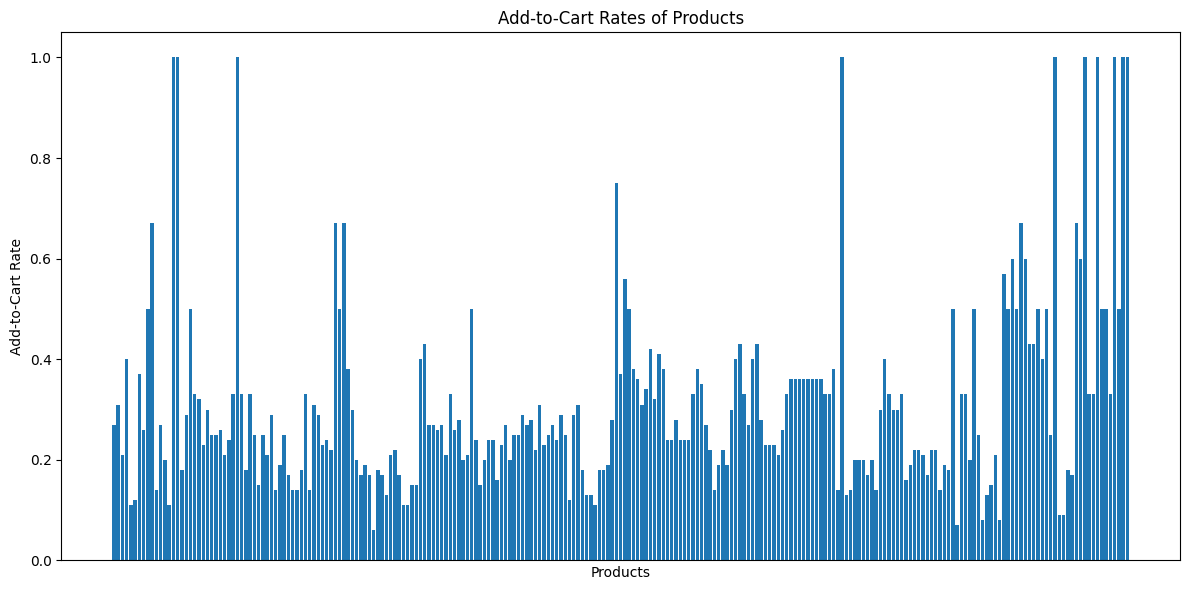

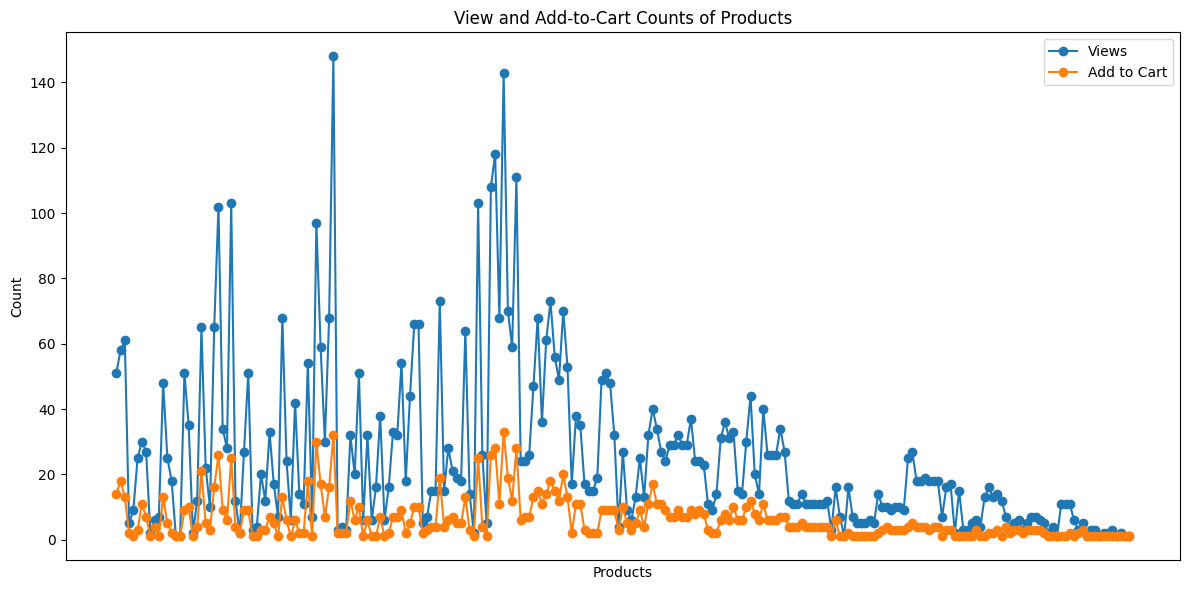

In [ ]:


# Select rows with non-zero values for easier data analysis
df_nonzero = df_item[(df_item['view_item'] > 0) & (df_item['add_to_cart'] > 0)]

# Find the top 5 products with the highest add-to-cart rate
top_basket_rate = df_nonzero.nlargest(5, 'basketToDetailRate')
console.print("\n[bold underline]Top 5 Products with Highest Add-to-Cart Rate:[/bold underline]")
table = Table(show_header=True, header_style="bold magenta")
table.add_column("Product Name", style="dim", width=40)
table.add_column("Add-to-Cart Rate")
for _, row in top_basket_rate.iterrows():
    table.add_row(row['item_name'], str(row['basketToDetailRate']))
console.print(table)

# Find the bottom 5 products with the lowest add-to-cart rate
bottom_basket_rate = df_nonzero.nsmallest(5, 'basketToDetailRate')
console.print("\n[bold underline]Bottom 5 Products with Lowest Add-to-Cart Rate:[/bold underline]")
table = Table(show_header=True, header_style="bold magenta")
table.add_column("Product Name", style="dim", width=40)
table.add_column("Add-to-Cart Rate")
for _, row in bottom_basket_rate.iterrows():
    table.add_row(row['item_name'], str(row['basketToDetailRate']))
console.print(table)

# Visualize the add-to-cart rates of the products
plt.figure(figsize=(12, 6))
plt.bar(df_nonzero['item_name'], df_nonzero['basketToDetailRate'])
plt.xticks([])  # Remove x-axis labels
plt.xlabel('Products')
plt.ylabel('Add-to-Cart Rate')
plt.title('Add-to-Cart Rates of Products')
plt.tight_layout()
plt.show()

# Compare the view and add-to-cart counts of the products
plt.figure(figsize=(12, 6))
plt.plot(df_nonzero['item_name'], df_nonzero['view_item'], marker='o', label='Views')
plt.plot(df_nonzero['item_name'], df_nonzero['add_to_cart'], marker='o', label='Add to Cart')
plt.xticks([])  # Remove x-axis labels
plt.xlabel('Products')
plt.ylabel('Count')
plt.title('View and Add-to-Cart Counts of Products')
plt.legend()
plt.tight_layout()
plt.show()


Null

| Row | column_name                            | null_ratio         |
|-----|----------------------------------------|--------------------|
| 1   | ecommerce.tax_value                    | 1.0                |
| 2   | ecommerce.shipping_value_in_usd        | 1.0                |
| 3   | ecommerce.purchase_revenue             | 1.0                |
| 4   | user_id                                | 1.0                |
| 5   | ecommerce.refund_value                 | 1.0                |
| 6   | ecommerce.shipping_value               | 1.0                |
| 7   | event_dimensions.hostname              | 1.0                |
| 8   | ecommerce.refund_value_in_usd          | 1.0                |
| 9   | ecommerce.tax_value_in_usd             | 1.0                |
| 10  | event_value_in_usd                     | 1.0                |
| 11  | event_previous_timestamp               | 1.0                |
| 12  | event_server_timestamp_offset          | 1.0                |
| 13  | ecommerce.purchase_revenue_in_usd      | 0.9992827211295254 |
| 14  | ecommerce.total_item_quantity          | 0.9870512288119597 |
| 15  | items.item_id                          | 0.8882932538034656 |
| 16  | ecommerce.unique_items                 | 0.8882932538034656 |
| 17  | ecommerce.transaction_id               | 0.847936879459     |


In [ ]:

# Columns to delete
columns_to_delete = [
    'ecommerce.tax_value', 'ecommerce.shipping_value_in_usd', 'ecommerce.purchase_revenue',
    'user_id', 'ecommerce.refund_value', 'ecommerce.shipping_value',
    'event_dimensions.hostname', 'ecommerce.refund_value_in_usd',
    'ecommerce.tax_value_in_usd', 'event_value_in_usd', 'event_previous_timestamp',
    'event_server_timestamp_offset', 'ecommerce.purchase_revenue_in_usd',
    'ecommerce.total_item_quantity', 'items.item_id', 'ecommerce.unique_items',
    'ecommerce.transaction_id'
]

# Drop columns
df = df.drop(columns=columns_to_delete, errors='ignore')

console.print("[bold green]Columns deleted.[/bold green]")

# Convert categorical data to numeric
char_cols = df.select_dtypes(include=['object']).columns
for c in char_cols:
    df[c] = pd.factorize(df[c])[0]

console.print("[bold green]Categorical data converted to numeric.[/bold green]")

# Show first 5 rows
console.print("\n[bold]First 5 rows:[/bold]")
table = Table(show_header=True, header_style="bold magenta")

# Add column headers
for column in df.columns:
    table.add_column(column)

# Add first 5 rows
for _, row in df.head().iterrows():
    table.add_row(*[str(value) for value in row])

console.print(table)

# General information about the dataset
console.print("\n[bold]Dataset Information:[/bold]")
console.print(f"Number of rows: {df.shape[0]}")
console.print(f"Number of columns: {df.shape[1]}")

# Show data types
console.print("\n[bold]Data Types:[/bold]")
for column, dtype in df.dtypes.items():
    console.print(f"{column}: {dtype}")

# Show number of missing values
console.print("\n[bold]Missing Values Count:[/bold]")
missing_values = df.isnull().sum()
for column, count in missing_values.items():
    if count > 0:
        console.print(f"{column}: {count}")

# Descriptive statistics
console.print("\n[bold]Descriptive Statistics:[/bold]")
desc_stats = df.describe()
console.print(desc_stats)


Columns deleted.

Categorical data converted to numeric.

First 5 rows:

┏━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓
┃ land… ┃ user… ┃ sess… ┃ page… ┃ sess… ┃ new_… ┃ sess… ┃ ga4_… ┃ ua_s… ┃ purc… ┃ ecom… ┃ reven… ┃ sele… ┃ selec… ┃
┡━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩
│ 0     │ 496   │ 561   │ 2374  │ 0.01… │ 391   │ 0.90… │ 23.2… │ 228.… │ 9     │ 0.01… │ nan    │ 43    │ 0.076… │
│ 1     │ 444   │ 457   │ 1113  │ 0.07… │ 425   │ 0.92… │ 10.4… │ 53.4… │ 1     │ 0.00… │ nan    │ 1     │ 0.002… │
│ 2     │ 41    │ 42    │ 87    │ 0.02… │ 31    │ 0.88… │ 7.19… │ 82.3… │ 0     │ 0.0   │ nan    │ 1     │ 0.023… │
│ 3     │ 155   │ 155   │ 350   │ 0.11… │ 141   │ 0.85… │ 10.0… │ 38.3… │ 1     │ 0.00… │ nan    │ 0     │ 0.0    │
│ 4     │ 516   │ 529   │ 2026  │ 0.01… │ 429   │ 0.96… │ 18.2… │ 199.… │ 4     │ 0.00… │ nan    │ 13    │ 0.024… │
└───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴────────┴───────┴────────┘

Dataset Information:

Number of rows: 131

Number of columns: 14

Data Types:

landing_page: int64

user_count: Int64

sessions: Int64

page_views: Int64

session_bounce_rate: float64

new_users: Int64

session_engagement_rate: float64

ga4_session_duration: float64

ua_session_duration: float64

purchases: Int64

ecomm_conversion_rate: float64

revenue: float64

select_promotion: Int64

select_promotion_conversion: float64

Missing Values Count:

ga4_session_duration: 20

revenue: 131

Descriptive Statistics:

landing_page  user_count   sessions  page_views  session_bounce_rate  \
count    131.000000       131.0      131.0       131.0           131.000000   
mean      64.000000   20.618321  21.748092   72.503817             0.076336   
std       37.960506   75.665301  80.223183  292.252403             0.227429   
min       -1.000000         1.0        1.0         0.0             0.000000   
25%       31.500000         1.0        1.0         2.0             0.000000   
50%       64.000000         2.0        3.0         6.0             0.000000   
75%       96.500000         6.5        7.0        25.0             0.000000   
max      129.000000       516.0      561.0      2374.0             1.000000   

       new_users  session_engagement_rate  ga4_session_duration  \
count      131.0               131.000000            111.000000   
mean   16.236641                 0.790882             23.680102   
std    65.019622                 0.319267             42.154016   
min          0.0                 0.000000              0.002000   
25%          1.0                 0.666667              2.974750   
50%          1.0                 1.000000             10.004273   
75%          4.0                 1.000000             22.813744   
max        429.0                 1.000000            303.127000   

       ua_session_duration  purchases  ecomm_conversion_rate  revenue  \
count           131.000000      131.0             131.000000      0.0   
mean            169.077733   0.145038               0.017422      NaN   
std             430.597549   0.878129               0.108241      NaN   
min               0.000000        0.0               0.000000      NaN   
25%               4.000000        0.0               0.000000      NaN   
50%              29.500000        0.0               0.000000      NaN   
75%             185.383333        0.0               0.000000      NaN   
max            3854.000000        9.0               1.000000      NaN   

       select_promotion  select_promotion_conversion  
count             131.0                   131.000000  
mean           0.541985                     0.006141  
std             3.93458                     0.036283  
min                 0.0                     0.000000  
25%                 0.0                     0.000000  
50%                 0.0                     0.000000  
75%                 0.0                     0.000000  
max                43.0                     0.375000

#ML Model

In [ ]:


# Display available columns
console.print("[bold]Available columns in the dataset:[/bold]")
console.print(df.columns.tolist())

# Calculate correlation with the 'purchases' variable
target_correlations = df.corr()['purchases'].sort_values(ascending=False)

# Convert correlation values to a 2D array
target_correlations_2d = target_correlations.values[:, np.newaxis]

# Create a heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(target_correlations_2d, annot=True, cmap='coolwarm', cbar=True,
            yticklabels=target_correlations.index, fmt='.2f')
plt.title("Correlation of Variables with Purchases")
plt.tight_layout()
plt.savefig('purchases_correlation_heatmap.png')
plt.close()

console.print("[bold green]Correlation heatmap saved as 'purchases_correlation_heatmap.png'.[/bold green]")

# Display top correlations
console.print("\n[bold]Top Correlations with Purchases:[/bold]")
table = Table(show_header=True, header_style="bold magenta")
table.add_column("Variable", style="dim")
table.add_column("Correlation", justify="right")
for var, corr in target_correlations.items():
    table.add_row(var, f"{corr:.4f}")
console.print(table)

# Display variables with absolute correlation greater than 0.3
high_corr = target_correlations[abs(target_correlations) > 0.3]
if not high_corr.empty:
    console.print("\n[bold]Variables with Absolute Correlation > 0.3 to Purchases:[/bold]")
    table = Table(show_header=True, header_style="bold magenta")
    table.add_column("Variable", style="dim")
    table.add_column("Correlation", justify="right")
    for var, corr in high_corr.items():
        table.add_row(var, f"{corr:.4f}")
    console.print(table)
else:
    console.print("\n[bold yellow]No variables found with absolute correlation > 0.3.[/bold yellow]")

# Display general statistics for purchases
total_sessions = df['sessions'].sum()
total_purchases = df['purchases'].sum()
purchase_rate = total_purchases / total_sessions

console.print(f"\n[bold]Purchase Statistics:[/bold]")
console.print(f"Total number of sessions: {total_sessions}")
console.print(f"Total number of purchases: {total_purchases}")
console.print(f"Purchase rate: {purchase_rate:.2%}")

# Additional analysis: Revenue per Purchase
df['revenue_per_purchase'] = df['revenue'] / df['purchases']
avg_revenue_per_purchase = df['revenue_per_purchase'].mean()

console.print(f"\n[bold]Revenue Analysis:[/bold]")
console.print(f"Average revenue per purchase: ${avg_revenue_per_purchase:.2f}")

# Scatter plot of Sessions vs Purchases
plt.figure(figsize=(10, 6))
plt.scatter(df['sessions'], df['purchases'], alpha=0.5)
plt.xlabel('Sessions')
plt.ylabel('Purchases')
plt.title('Sessions vs Purchases')
plt.savefig('sessions_vs_purchases_scatter.png')
plt.close()

console.print("[bold green]Scatter plot of Sessions vs Purchases saved as 'sessions_vs_purchases_scatter.png'.[/bold green]")

# Bar plot of top landing pages by purchases
top_landing_pages = df.groupby('landing_page')['purchases'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_landing_pages.plot(kind='bar')
plt.title('Top 10 Landing Pages by Purchases')
plt.xlabel('Landing Page')
plt.ylabel('Total Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_landing_pages_by_purchases.png')
plt.close()

console.print("[bold green]Bar plot of top landing pages by purchases saved as 'top_landing_pages_by_purchases.png'.[/bold green]")

Available columns in the dataset:

[
    'landing_page',
    'user_count',
    'sessions',
    'page_views',
    'session_bounce_rate',
    'new_users',
    'session_engagement_rate',
    'ga4_session_duration',
    'ua_session_duration',
    'purchases',
    'ecomm_conversion_rate',
    'revenue',
    'select_promotion',
    'select_promotion_conversion'
]

Correlation heatmap saved as 'purchases_correlation_heatmap.png'.

Top Correlations with Purchases:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Variable                    ┃ Correlation ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ purchases                   │      1.0000 │
│ select_promotion            │      0.9567 │
│ page_views                  │      0.8883 │
│ sessions                    │      0.8051 │
│ user_count                  │      0.7808 │
│ new_users                   │      0.7405 │
│ ecomm_conversion_rate       │      0.1701 │
│ select_promotion_conversion │      0.1626 │
│ ga4_session_duration        │      0.0739 │
│ session_engagement_rate     │      0.0616 │
│ ua_session_duration         │      0.0588 │
│ session_bounce_rate         │     -0.0420 │
│ landing_page                │     -0.2308 │
│ revenue                     │         nan │
└─────────────────────────────┴─────────────┘

Variables with Absolute Correlation > 0.3 to Purchases:

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Variable         ┃ Correlation ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ purchases        │      1.0000 │
│ select_promotion │      0.9567 │
│ page_views       │      0.8883 │
│ sessions         │      0.8051 │
│ user_count       │      0.7808 │
│ new_users        │      0.7405 │
└──────────────────┴─────────────┘

Purchase Statistics:

Total number of sessions: 2849

Total number of purchases: 19

Purchase rate: 0.67%

Revenue Analysis:

Average revenue per purchase: $<NA>

Scatter plot of Sessions vs Purchases saved as 'sessions_vs_purchases_scatter.png'.

Bar plot of top landing pages by purchases saved as 'top_landing_pages_by_purchases.png'.

In [ ]:
from lightgbm import LGBMClassifier
import logging
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

X=df.drop(['purchases'], axis=1)

y=df['purchases']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=12345)


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:


lgbm_model = LGBMClassifier(random_state=12345, verbose=-1).fit(X_train, y_train)


cv = 8
cv_results_train = cross_val_score(lgbm_model, X_train, y_train, cv=cv, scoring="accuracy")
cv_results_test = cross_val_score(lgbm_model, X_test, y_test, cv=cv, scoring="accuracy")

print(f"cross_val_score (train): {cv_results_train.mean():.4f}")
print(f"cross_val_score (test): {cv_results_test.mean():.4f}")


y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)


logging.getLogger('lightgbm').setLevel(logging.ERROR)


cross_val_score (train): 0.9327
cross_val_score (test): 0.9062


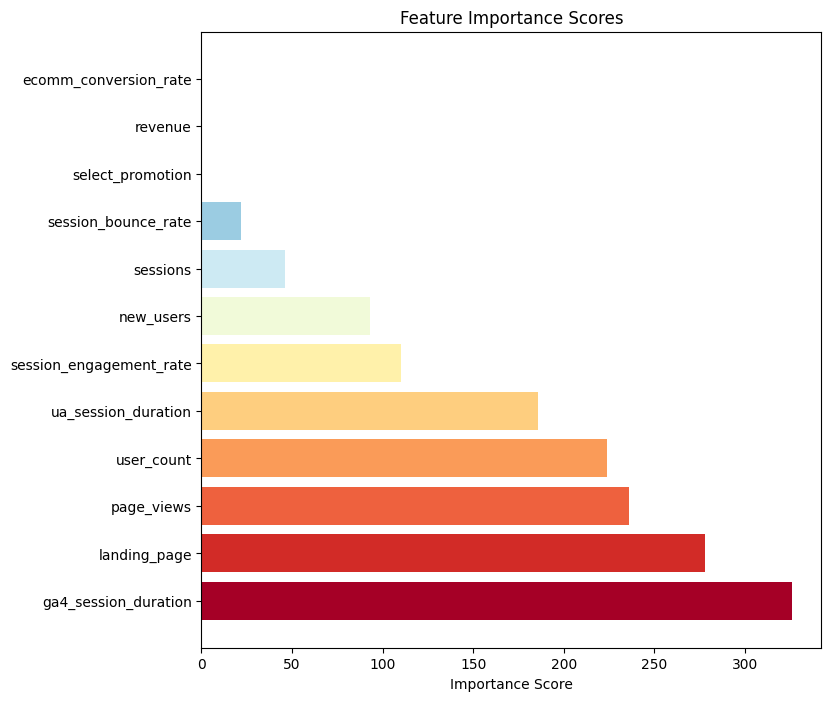

In [ ]:


# Get feature importances and names
importances = lgbm_model.feature_importances_
features = X.columns

# Sort features by their importance
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

# Create a color gradient (Red to Yellow)
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(sorted_features)))

# Plot the graph
plt.figure(figsize=(8, 8))
bars = plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()
